Fits for number of data points:1000
Predicts and computes accuracy for the entire data set
Fits for number of data points:10000
Predicts and computes accuracy for the entire data set
Fits for number of data points:20000
Predicts and computes accuracy for the entire data set
Fits for number of data points:35000
Predicts and computes accuracy for the entire data set
Fits for number of data points:50000
Predicts and computes accuracy for the entire data set
CPU times: user 34min 38s, sys: 2h 19min 34s, total: 2h 54min 12s
Wall time: 11min 12s


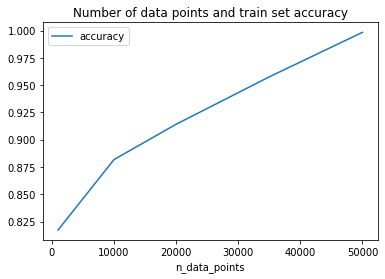

In [1]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from utils import results, get_reviews
import pandas as pd

def make_baseline_sklearn():
    return Pipeline([
        ('d2v', CountVectorizer(
            max_features=10000,
            max_df=0.95, min_df=0.01)),
        ('classifier', MLPClassifier(
            batch_size=128, hidden_layer_sizes=(64, 64),
            solver='adam', verbose=False, max_iter=400,
            n_iter_no_change=50
        ))
    ])


df = get_reviews()
#df = df.sample(1000)
        
(
    pd.DataFrame(results(
        df,
        make_model=make_baseline_sklearn,
        n_data_points=[1000, 10000, 20000, 35000, len(df)],
        #n_data_points=[100, 500, len(df)],
        batch_size_inference=1024
    ))
    .set_index('n_data_points')
    .plot(title='Number of data points and train set accuracy')
);